![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [196]:
# Start your code here!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin

**1.Exploratory data analysis**

In [197]:
men_results = pd.read_csv("men_results.csv", parse_dates = ['date'], index_col =  "Unnamed: 0")
men_results['total_score'] = men_results['home_score'] + men_results['away_score']
print(men_results.head())
print(men_results.info())
print(men_results['tournament'].value_counts())

        date home_team away_team  ...  away_score  tournament total_score
0 1872-11-30  Scotland   England  ...           0    Friendly           0
1 1873-03-08   England  Scotland  ...           2    Friendly           6
2 1874-03-07  Scotland   England  ...           1    Friendly           3
3 1875-03-06   England  Scotland  ...           2    Friendly           4
4 1876-03-04  Scotland   England  ...           0    Friendly           3

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         44353 non-null  datetime64[ns]
 1   home_team    44353 non-null  object        
 2   away_team    44353 non-null  object        
 3   home_score   44353 non-null  int64         
 4   away_score   44353 non-null  int64         
 5   tournament   44353 non-null  object        
 6   total_score  44353 non-null  

In [198]:
women_results = pd.read_csv("women_results.csv", parse_dates = ['date'], index_col =  "Unnamed: 0")
women_results['total_score'] = women_results['home_score'] + women_results['away_score']
print(women_results.head())
print(women_results.info())

        date home_team  away_team  ...  away_score        tournament total_score
0 1969-11-01     Italy     France  ...           0              Euro           1
1 1969-11-01   Denmark    England  ...           3              Euro           7
2 1969-11-02   England     France  ...           0              Euro           2
3 1969-11-02     Italy    Denmark  ...           1              Euro           4
4 1975-08-25  Thailand  Australia  ...           2  AFC Championship           5

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4884 non-null   datetime64[ns]
 1   home_team    4884 non-null   object        
 2   away_team    4884 non-null   object        
 3   home_score   4884 non-null   int64         
 4   away_score   4884 non-null   int64         
 5   tournament   4884 non-null   object   

**2.Filtering the data**

Filter the data to only include official FIFA World Cup matches that took place after 2002-01-01.

In [199]:
men_results_FIFA_since_2002 = men_results[(men_results['date'] >= "2002-01-01") & \
               (men_results['tournament'] == "FIFA World Cup")]
len(men_results_FIFA_since_2002)

384

In [200]:
women_results_FIFA_since_2002 = women_results[(women_results['date'] >= "2002-01-01") & \
               (women_results['tournament'] == "FIFA World Cup")]
len(women_results_FIFA_since_2002)

200

**3.Choosing the correct hypothesis test**

Determining if the data is normally distributed

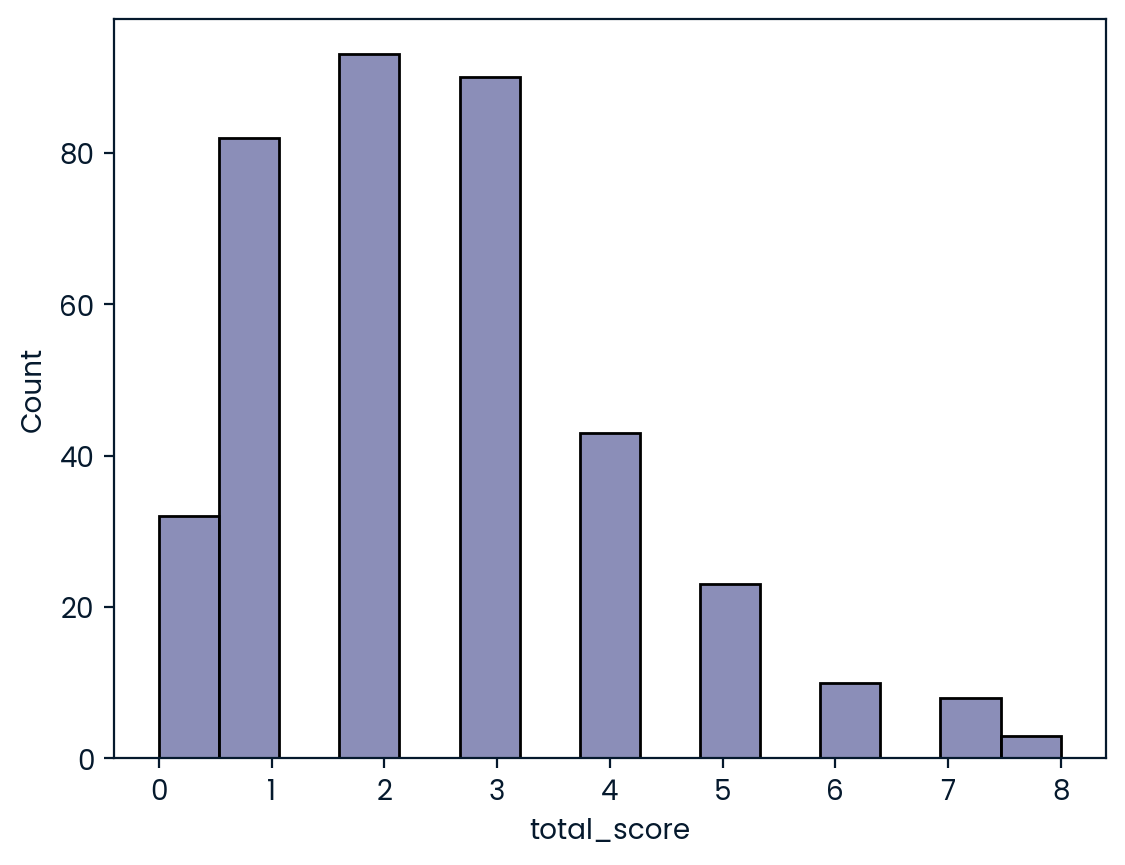

In [201]:
sns.histplot(data=men_results_FIFA_since_2002, x="total_score")
plt.show()

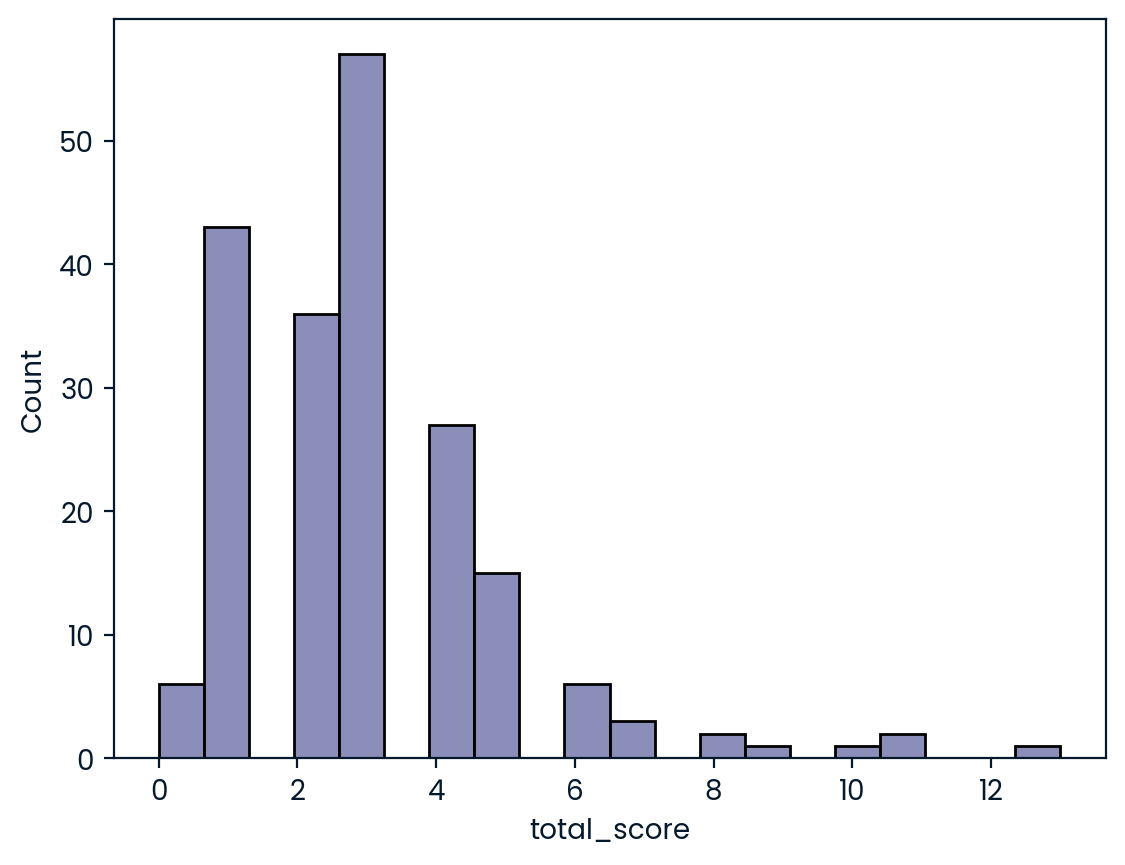

In [202]:
sns.histplot(data=women_results_FIFA_since_2002, x="total_score")
plt.show()

**4.Performing the hypothesis test**

How to perform the hypothesis test using pingouin

In [203]:
women_results_FIFA_since_2002['sexe'] = 'woman'
men_results_FIFA_since_2002['sexe'] = 'man'
men_vs_women = pd.concat([women_results_FIFA_since_2002[['sexe', 'total_score']], men_results_FIFA_since_2002[['sexe', 'total_score']]], axis=0, ignore_index=True)
men_vs_women

,sexe,total_score
0,woman,3
1,woman,2
2,woman,5
3,woman,6
4,woman,4
...,...,...
579,man,3
580,man,3
581,man,2
582,man,3


In [204]:
men_vs_women_wide = men_vs_women.pivot(columns='sexe', 
                                           values='total_score')
men_vs_women_wide
wmw_test = pingouin.mwu(x=men_vs_women_wide['woman'], y=men_vs_women_wide['man'], alternative = "greater")
wmw_test

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


**5.Interpreting the result of the hypothesis test**

Significance level / alpha = 0.10 \
P value = 0.005 \
P value < alpha => reject

In [205]:
result_dict = {"p_val": wmw_test[['p-val']].iloc[0, 0], "result": "reject"} 
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}